In [2]:
# create index for birthyear
# then correlate with gdp_lag
# then correlate with and gdp_capita_lag
# try examples, then do for all

In [3]:
import sys
import pandas as pd
import numpy as np
sys.path.append('../')
from tqdm import tqdm

from functions_environment import get_maddison_data, get_population
from functions_stats import create_df_trend, get_individual_score
from sys_utils import load_model
from data_model import Individual
from data_model_region import Region

In [4]:
def get_stars(p):
    if  p<0.05:
        return '*'
    elif  p<0.01:
         return '**'
    elif  p<0.001:
        return '***'
    else:
        return ""

In [5]:
def interpolate_yearly(df, value = 'value', category = 'region_code', year = 'year'):

    year_range = np.arange(-1000, 1850, 1)
    df_year = pd.DataFrame(year_range, columns = [year]).reset_index(drop=True)

    df_interpolated_list = []
    for reg in set(df[category]):

        res = df[df[category]==reg]
        res = pd.merge(res, df_year, on = year, how = 'outer')
        res[category] = reg
        res = res.sort_values(year, ascending=True
                             )
        res['value_interpolated'] = res[value].interpolate(method='linear')
        res = res.reset_index(drop=True)
        res = res[~res['value_interpolated'].isna()]

        df_interpolated_list.append(res)
        
    df_interpolated = pd.concat([x for x in df_interpolated_list])
    df_interpolated = df_interpolated.reset_index(drop=True)

    return df_interpolated

In [6]:
data_path_environment = '../data_env'
path_to_visualisation = '../data_visualisation'
checkpoint_path = '../checkpoints_dev'

df_maddison = get_maddison_data(data_path_environment)
df_maddison = df_maddison.drop('country_code_maddison', axis=1)

df_population = get_population(data_path_environment)

regions = load_model(
        Region, name=checkpoint_path+"/regions.jsonl"
    )

In [7]:
individuals = load_model(
        Individual, name=checkpoint_path + "/individuals.jsonl"
    )


In [8]:
import plotly.express as px
from utils import round_nearest
import typing as t

In [10]:
individuals[0].impact_years

(1660, 1710)

In [12]:
def get_individual_score(individuals:t.List[Individual]):

    individuals_filtered = [x for x in individuals if x.regions != None]

    df_individuals = [
        {
            "wikidata_id": x.id.wikidata_id,
            "name": x.id.name,
            "birthyear": x.id.birthyear,
            "impact_years":x.impact_years,
            "cultural_score": x.cultural_score,
            "region_code": x.regions,
        }
        for x in individuals_filtered
    ]

    df_individuals = pd.DataFrame(df_individuals)
    df_individuals = df_individuals.dropna()
    df_individuals = df_individuals.explode("region_code").reset_index(drop=True)
    #df_individuals['year'] = df_individuals['year'].apply(lambda x : round_nearest(x,10))

    return df_individuals

In [13]:
def round_to_nearest_new(x, num = 10):
    return round(x / num) * num

In [14]:
df_score_all = get_individual_score(individuals)

In [456]:
df_maddison['region_code'][df_maddison['region_code'] == 're_netherlands'] = 're_low_countries'

/var/folders/lx/9b13r6ln63jb54_3xlf9b_380000gn/T/ipykernel_32343/3648903250.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [15]:
pd.set_option('chained_assignment',None)


In [529]:
#px.line(df_trend, x = 'year', y = 'cultural_score')

In [18]:
exemple = "re_japan"

In [19]:
from scipy.stats import pearsonr


In [20]:
df_score = df_score_all[df_score_all['region_code']==exemple]

In [23]:
df_score['year'] = df_score["impact_years"].apply(
        lambda x: [year for year in range(int(x[0]), int(x[1]) + 10, 10)]
    )

In [26]:
exemple = "re_chinese_world"

In [37]:
df_trend

region_code  year  cultural_score
0    re_chinese_world -1000        0.100140
1    re_chinese_world  -720        0.109604
2    re_chinese_world  -690        0.100464
3    re_chinese_world  -550        0.694298
4    re_chinese_world  -540        0.251777
..                ...   ...             ...
204  re_chinese_world  1800        3.120155
205  re_chinese_world  1810        3.135833
206  re_chinese_world  1820        3.529615
207  re_chinese_world  1830        2.535176
208  re_chinese_world  1840        5.493871

[209 rows x 3 columns]

                                         OLS Regression Results                                        
Dep. Variable:     cultural_score_interpolared_per_capita_norm   R-squared:                       0.863
Model:                                                     OLS   Adj. R-squared:                  0.862
Method:                                          Least Squares   F-statistic:                     1246.
Date:                                         Mon, 03 Apr 2023   Prob (F-statistic):          5.15e-256
Time:                                                 17:48:30   Log-Likelihood:                 543.73
No. Observations:                                          599   AIC:                            -1079.
Df Residuals:                                              595   BIC:                            -1062.
Df Model:                                                    3                                         
Covariance Type:                                     nonrobust  

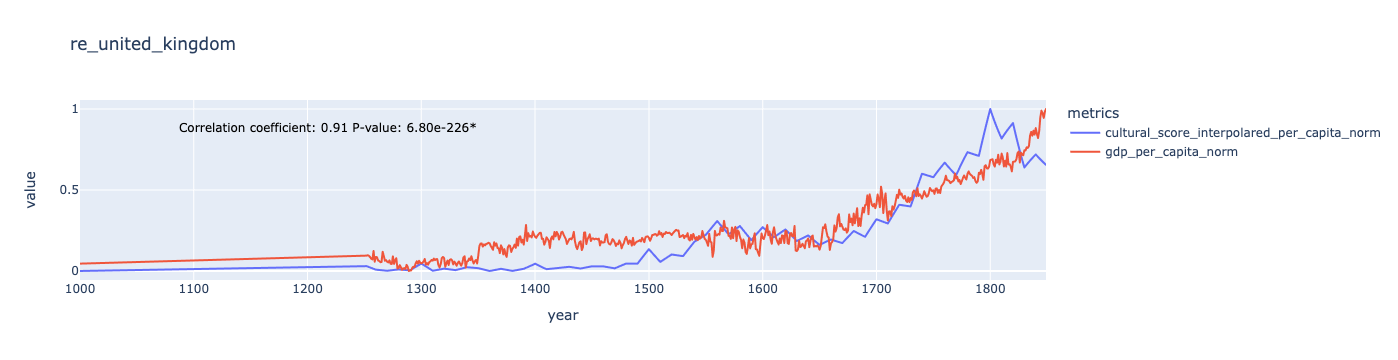

                                         OLS Regression Results                                        
Dep. Variable:     cultural_score_interpolared_per_capita_norm   R-squared:                       0.593
Model:                                                     OLS   Adj. R-squared:                 -0.016
Method:                                          Least Squares   F-statistic:                    0.9732
Date:                                         Mon, 03 Apr 2023   Prob (F-statistic):              0.543
Time:                                                 17:48:30   Log-Likelihood:                0.46815
No. Observations:                                            6   AIC:                             7.064
Df Residuals:                                                2   BIC:                             6.231
Df Model:                                                    3                                         
Covariance Type:                                     nonrobust  

/Users/charlesdedampierre/Library/Caches/pypoetry/virtualenvs/market_use_cases-Q45SxFKl-py3.8/lib/python3.8/site-packages/statsmodels/stats/stattools.py:74: ValueWarning:

omni_normtest is not valid with less than 8 observations; 6 samples were given.



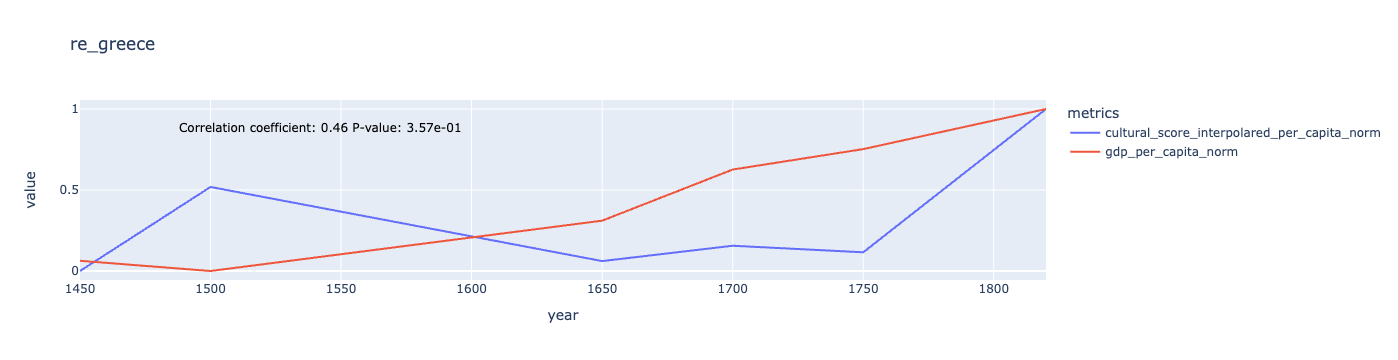

                                         OLS Regression Results                                        
Dep. Variable:     cultural_score_interpolared_per_capita_norm   R-squared:                       0.433
Model:                                                     OLS   Adj. R-squared:                  0.429
Method:                                          Least Squares   F-statistic:                     125.0
Date:                                         Mon, 03 Apr 2023   Prob (F-statistic):           3.34e-60
Time:                                                 17:48:31   Log-Likelihood:                 100.85
No. Observations:                                          496   AIC:                            -193.7
Df Residuals:                                              492   BIC:                            -176.9
Df Model:                                                    3                                         
Covariance Type:                                     nonrobust  

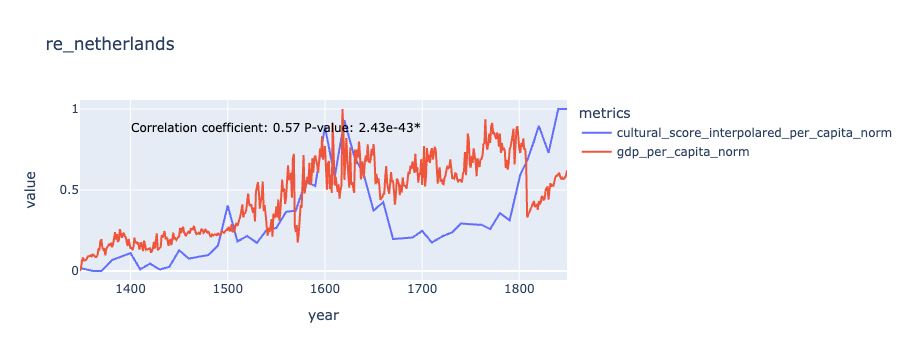

                                         OLS Regression Results                                        
Dep. Variable:     cultural_score_interpolared_per_capita_norm   R-squared:                       0.450
Model:                                                     OLS   Adj. R-squared:                  0.038
Method:                                          Least Squares   F-statistic:                     1.092
Date:                                         Mon, 03 Apr 2023   Prob (F-statistic):              0.449
Time:                                                 17:48:31   Log-Likelihood:                0.52292
No. Observations:                                            8   AIC:                             6.954
Df Residuals:                                                4   BIC:                             7.272
Df Model:                                                    3                                         
Covariance Type:                                     nonrobust  

/Users/charlesdedampierre/Library/Caches/pypoetry/virtualenvs/market_use_cases-Q45SxFKl-py3.8/lib/python3.8/site-packages/scipy/stats/_stats_py.py:1772: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=8



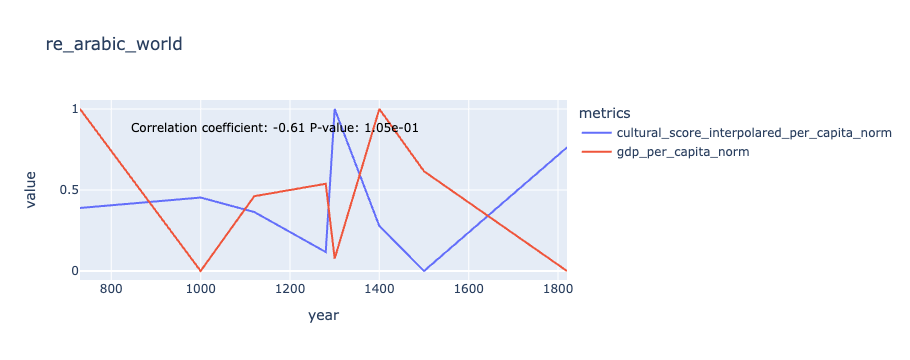

                                         OLS Regression Results                                        
Dep. Variable:     cultural_score_interpolared_per_capita_norm   R-squared:                       1.000
Model:                                                     OLS   Adj. R-squared:                    nan
Method:                                          Least Squares   F-statistic:                       nan
Date:                                         Mon, 03 Apr 2023   Prob (F-statistic):                nan
Time:                                                 17:48:31   Log-Likelihood:                 91.013
No. Observations:                                            3   AIC:                            -176.0
Df Residuals:                                                0   BIC:                            -178.7
Df Model:                                                    2                                         
Covariance Type:                                     nonrobust  

/Users/charlesdedampierre/Library/Caches/pypoetry/virtualenvs/market_use_cases-Q45SxFKl-py3.8/lib/python3.8/site-packages/statsmodels/stats/stattools.py:74: ValueWarning:

omni_normtest is not valid with less than 8 observations; 3 samples were given.

/Users/charlesdedampierre/Library/Caches/pypoetry/virtualenvs/market_use_cases-Q45SxFKl-py3.8/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1749: RuntimeWarning:

divide by zero encountered in true_divide

/Users/charlesdedampierre/Library/Caches/pypoetry/virtualenvs/market_use_cases-Q45SxFKl-py3.8/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1749: RuntimeWarning:

invalid value encountered in double_scalars

/Users/charlesdedampierre/Library/Caches/pypoetry/virtualenvs/market_use_cases-Q45SxFKl-py3.8/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1671: RuntimeWarning:

divide by zero encountered in double_scalars



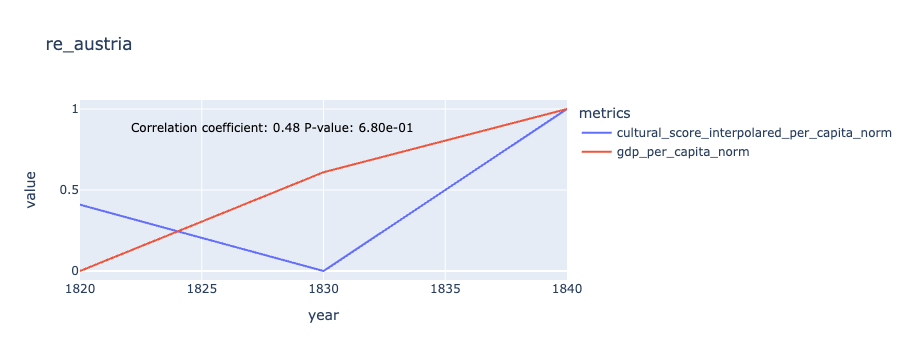

                                         OLS Regression Results                                        
Dep. Variable:     cultural_score_interpolared_per_capita_norm   R-squared:                       0.920
Model:                                                     OLS   Adj. R-squared:                  0.919
Method:                                          Least Squares   F-statistic:                     2050.
Date:                                         Mon, 03 Apr 2023   Prob (F-statistic):          3.31e-293
Time:                                                 17:48:32   Log-Likelihood:                 764.14
No. Observations:                                          540   AIC:                            -1520.
Df Residuals:                                              536   BIC:                            -1503.
Df Model:                                                    3                                         
Covariance Type:                                     nonrobust  

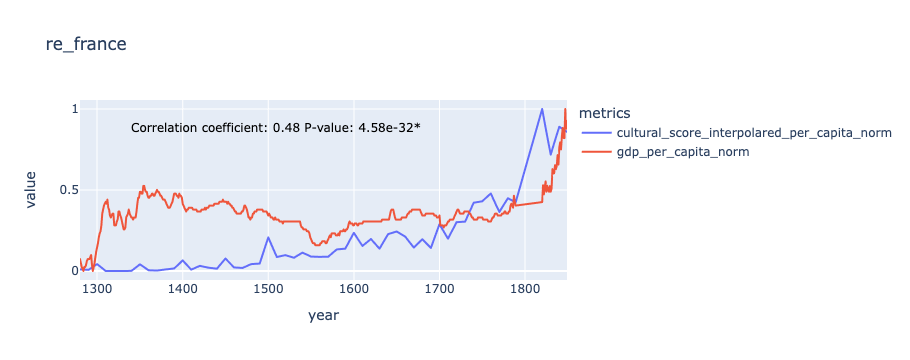

                                         OLS Regression Results                                        
Dep. Variable:     cultural_score_interpolared_per_capita_norm   R-squared:                       0.664
Model:                                                     OLS   Adj. R-squared:                  0.552
Method:                                          Least Squares   F-statistic:                     5.922
Date:                                         Mon, 03 Apr 2023   Prob (F-statistic):             0.0163
Time:                                                 17:48:33   Log-Likelihood:                 5.8702
No. Observations:                                           13   AIC:                            -3.740
Df Residuals:                                                9   BIC:                            -1.481
Df Model:                                                    3                                         
Covariance Type:                                     nonrobust  

/Users/charlesdedampierre/Library/Caches/pypoetry/virtualenvs/market_use_cases-Q45SxFKl-py3.8/lib/python3.8/site-packages/scipy/stats/_stats_py.py:1772: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=13



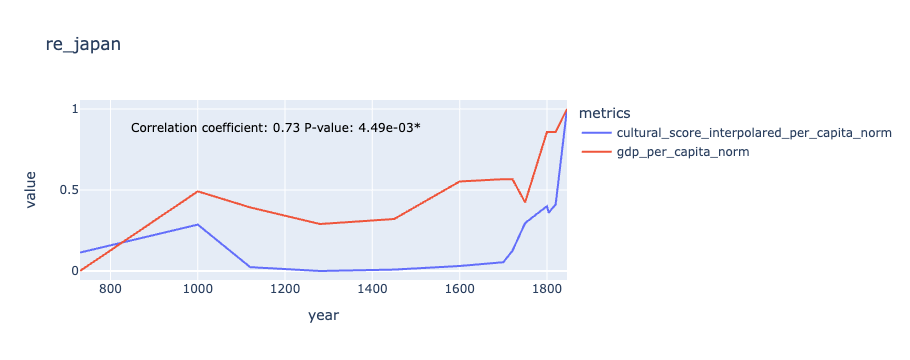

                                         OLS Regression Results                                        
Dep. Variable:     cultural_score_interpolared_per_capita_norm   R-squared:                       0.773
Model:                                                     OLS   Adj. R-squared:                  0.748
Method:                                          Least Squares   F-statistic:                     30.70
Date:                                         Mon, 03 Apr 2023   Prob (F-statistic):           1.58e-06
Time:                                                 17:48:34   Log-Likelihood:                 9.1930
No. Observations:                                           21   AIC:                            -12.39
Df Residuals:                                               18   BIC:                            -9.252
Df Model:                                                    2                                         
Covariance Type:                                     nonrobust  

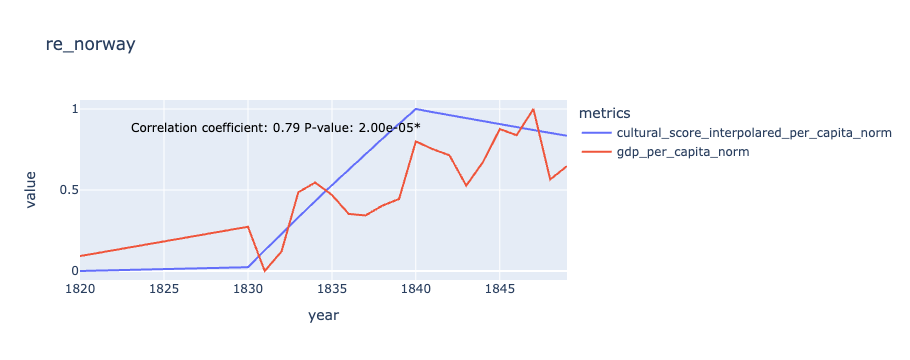

                                         OLS Regression Results                                        
Dep. Variable:     cultural_score_interpolared_per_capita_norm   R-squared:                       1.000
Model:                                                     OLS   Adj. R-squared:                  1.000
Method:                                          Least Squares   F-statistic:                 3.616e+26
Date:                                         Mon, 03 Apr 2023   Prob (F-statistic):               0.00
Time:                                                 17:48:34   Log-Likelihood:                 16074.
No. Observations:                                          541   AIC:                        -3.214e+04
Df Residuals:                                              537   BIC:                        -3.212e+04
Df Model:                                                    3                                         
Covariance Type:                                     nonrobust  

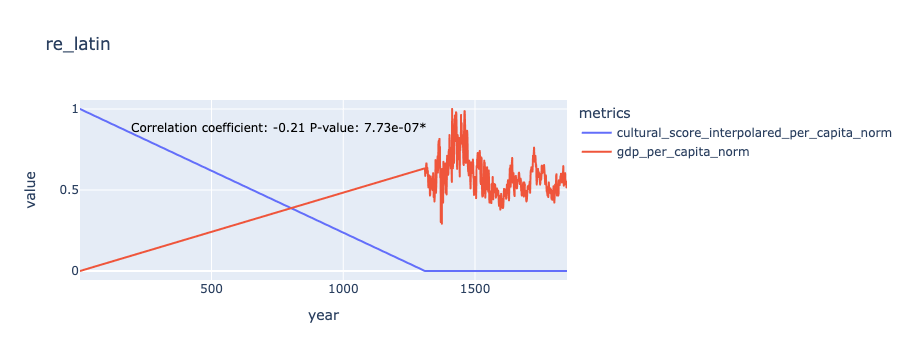

                                         OLS Regression Results                                        
Dep. Variable:     cultural_score_interpolared_per_capita_norm   R-squared:                       0.574
Model:                                                     OLS   Adj. R-squared:                  0.572
Method:                                          Least Squares   F-statistic:                     241.1
Date:                                         Mon, 03 Apr 2023   Prob (F-statistic):           4.66e-99
Time:                                                 17:48:34   Log-Likelihood:                 267.02
No. Observations:                                          541   AIC:                            -526.0
Df Residuals:                                              537   BIC:                            -508.9
Df Model:                                                    3                                         
Covariance Type:                                     nonrobust  

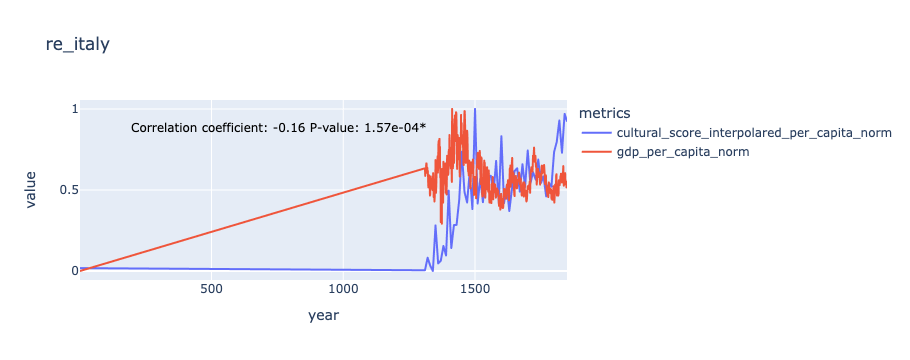

                                         OLS Regression Results                                        
Dep. Variable:     cultural_score_interpolared_per_capita_norm   R-squared:                       0.918
Model:                                                     OLS   Adj. R-squared:                  0.917
Method:                                          Least Squares   F-statistic:                     1591.
Date:                                         Mon, 03 Apr 2023   Prob (F-statistic):          1.20e-231
Time:                                                 17:48:34   Log-Likelihood:                 567.95
No. Observations:                                          432   AIC:                            -1128.
Df Residuals:                                              428   BIC:                            -1112.
Df Model:                                                    3                                         
Covariance Type:                                     nonrobust  

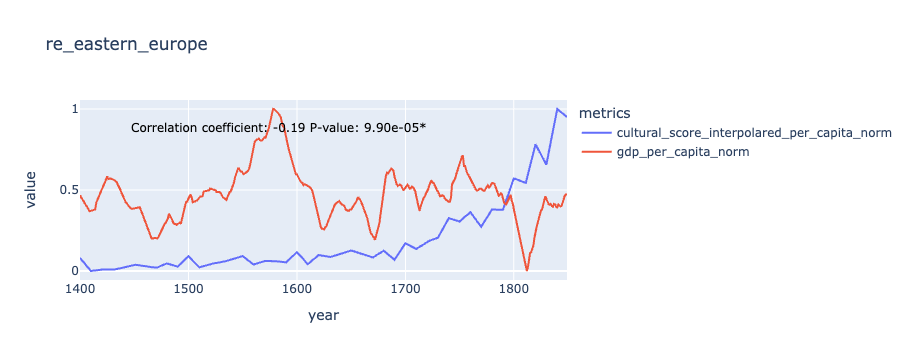

                                         OLS Regression Results                                        
Dep. Variable:     cultural_score_interpolared_per_capita_norm   R-squared:                       0.144
Model:                                                     OLS   Adj. R-squared:                  0.080
Method:                                          Least Squares   F-statistic:                     2.263
Date:                                         Mon, 03 Apr 2023   Prob (F-statistic):              0.123
Time:                                                 17:48:35   Log-Likelihood:               -0.85040
No. Observations:                                           30   AIC:                             7.701
Df Residuals:                                               27   BIC:                             11.90
Df Model:                                                    2                                         
Covariance Type:                                     nonrobust  

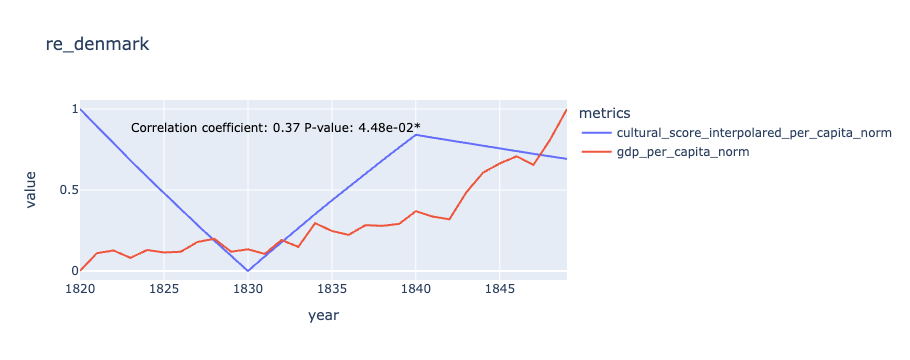

                                         OLS Regression Results                                        
Dep. Variable:     cultural_score_interpolared_per_capita_norm   R-squared:                       0.881
Model:                                                     OLS   Adj. R-squared:                  0.763
Method:                                          Least Squares   F-statistic:                     7.434
Date:                                         Mon, 03 Apr 2023   Prob (F-statistic):             0.0668
Time:                                                 17:48:35   Log-Likelihood:                 3.9237
No. Observations:                                            7   AIC:                            0.1525
Df Residuals:                                                3   BIC:                          -0.06383
Df Model:                                                    3                                         
Covariance Type:                                     nonrobust  

/Users/charlesdedampierre/Library/Caches/pypoetry/virtualenvs/market_use_cases-Q45SxFKl-py3.8/lib/python3.8/site-packages/statsmodels/stats/stattools.py:74: ValueWarning:

omni_normtest is not valid with less than 8 observations; 7 samples were given.



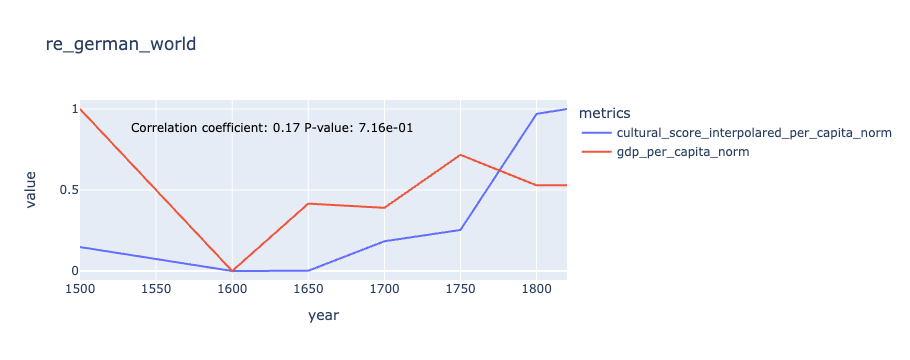

                                         OLS Regression Results                                        
Dep. Variable:     cultural_score_interpolared_per_capita_norm   R-squared:                       0.418
Model:                                                     OLS   Adj. R-squared:                 -0.164
Method:                                          Least Squares   F-statistic:                    0.7182
Date:                                         Mon, 03 Apr 2023   Prob (F-statistic):              0.604
Time:                                                 17:48:36   Log-Likelihood:               -0.39987
No. Observations:                                            7   AIC:                             8.800
Df Residuals:                                                3   BIC:                             8.583
Df Model:                                                    3                                         
Covariance Type:                                     nonrobust  

/Users/charlesdedampierre/Library/Caches/pypoetry/virtualenvs/market_use_cases-Q45SxFKl-py3.8/lib/python3.8/site-packages/statsmodels/stats/stattools.py:74: ValueWarning:

omni_normtest is not valid with less than 8 observations; 7 samples were given.



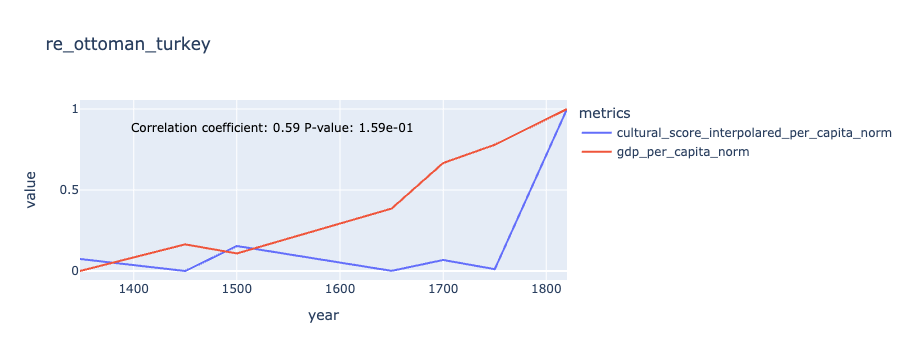

                                         OLS Regression Results                                        
Dep. Variable:     cultural_score_interpolared_per_capita_norm   R-squared:                       0.952
Model:                                                     OLS   Adj. R-squared:                  0.952
Method:                                          Least Squares   F-statistic:                     3647.
Date:                                         Mon, 03 Apr 2023   Prob (F-statistic):               0.00
Time:                                                 17:48:37   Log-Likelihood:                 802.83
No. Observations:                                          550   AIC:                            -1598.
Df Residuals:                                              546   BIC:                            -1580.
Df Model:                                                    3                                         
Covariance Type:                                     nonrobust  

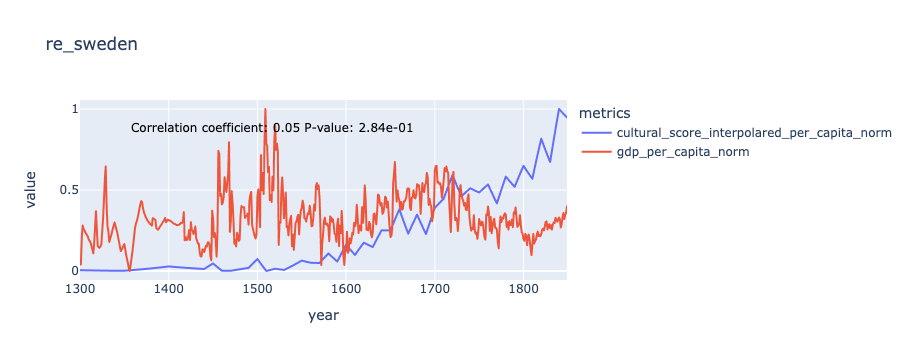

                                         OLS Regression Results                                        
Dep. Variable:     cultural_score_interpolared_per_capita_norm   R-squared:                       0.651
Model:                                                     OLS   Adj. R-squared:                  0.520
Method:                                          Least Squares   F-statistic:                     4.967
Date:                                         Mon, 03 Apr 2023   Prob (F-statistic):             0.0311
Time:                                                 17:48:37   Log-Likelihood:                 3.6913
No. Observations:                                           12   AIC:                            0.6174
Df Residuals:                                                8   BIC:                             2.557
Df Model:                                                    3                                         
Covariance Type:                                     nonrobust  

/Users/charlesdedampierre/Library/Caches/pypoetry/virtualenvs/market_use_cases-Q45SxFKl-py3.8/lib/python3.8/site-packages/scipy/stats/_stats_py.py:1772: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=12



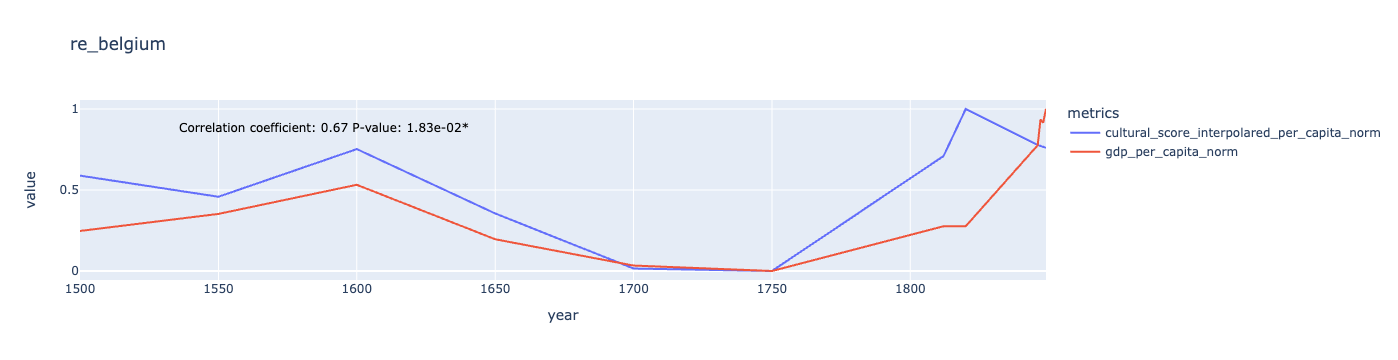

                                         OLS Regression Results                                        
Dep. Variable:     cultural_score_interpolared_per_capita_norm   R-squared:                       0.787
Model:                                                     OLS   Adj. R-squared:                  0.785
Method:                                          Least Squares   F-statistic:                     389.9
Date:                                         Mon, 03 Apr 2023   Prob (F-statistic):          7.60e-106
Time:                                                 17:48:39   Log-Likelihood:                 318.50
No. Observations:                                          320   AIC:                            -629.0
Df Residuals:                                              316   BIC:                            -613.9
Df Model:                                                    3                                         
Covariance Type:                                     nonrobust  

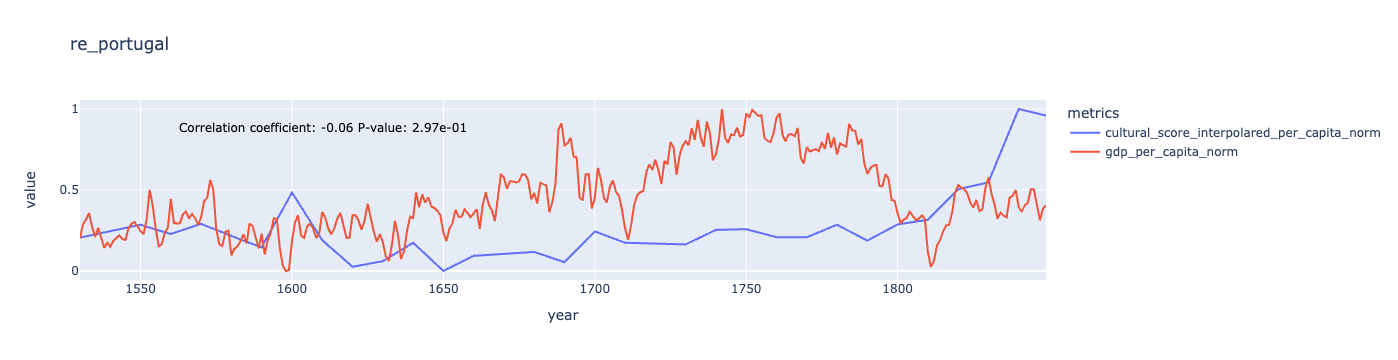

                                         OLS Regression Results                                        
Dep. Variable:     cultural_score_interpolared_per_capita_norm   R-squared:                       0.709
Model:                                                     OLS   Adj. R-squared:                  0.534
Method:                                          Least Squares   F-statistic:                     4.055
Date:                                         Mon, 03 Apr 2023   Prob (F-statistic):             0.0830
Time:                                                 17:48:39   Log-Likelihood:                 3.9095
No. Observations:                                            9   AIC:                            0.1809
Df Residuals:                                                5   BIC:                            0.9698
Df Model:                                                    3                                         
Covariance Type:                                     nonrobust  

/Users/charlesdedampierre/Library/Caches/pypoetry/virtualenvs/market_use_cases-Q45SxFKl-py3.8/lib/python3.8/site-packages/scipy/stats/_stats_py.py:1772: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=9



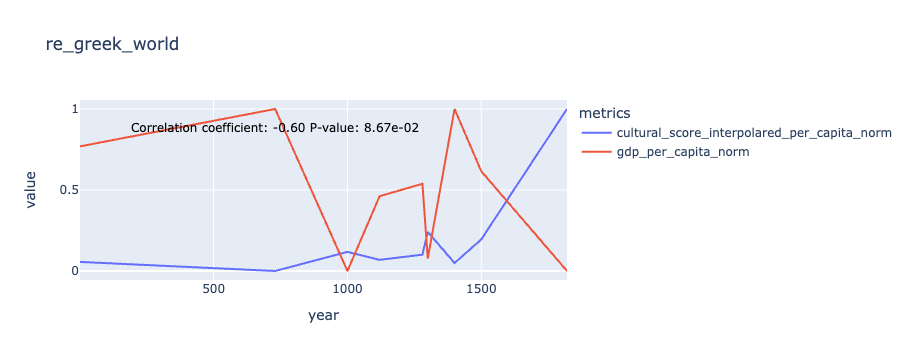

                                         OLS Regression Results                                        
Dep. Variable:     cultural_score_interpolared_per_capita_norm   R-squared:                       0.735
Model:                                                     OLS   Adj. R-squared:                  0.720
Method:                                          Least Squares   F-statistic:                     49.90
Date:                                         Mon, 03 Apr 2023   Prob (F-statistic):           1.39e-15
Time:                                                 17:48:39   Log-Likelihood:                 46.315
No. Observations:                                           58   AIC:                            -84.63
Df Residuals:                                               54   BIC:                            -76.39
Df Model:                                                    3                                         
Covariance Type:                                     nonrobust  

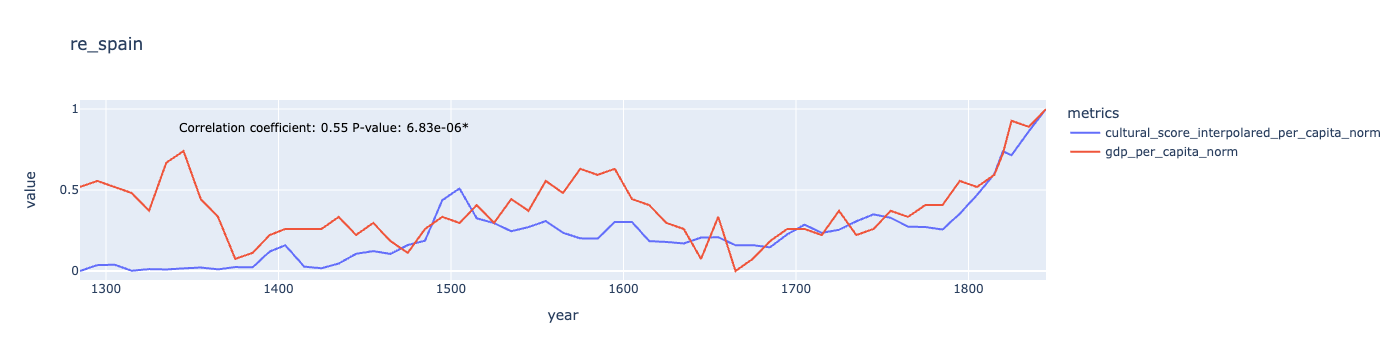

                                         OLS Regression Results                                        
Dep. Variable:     cultural_score_interpolared_per_capita_norm   R-squared:                       0.849
Model:                                                     OLS   Adj. R-squared:                  0.697
Method:                                          Least Squares   F-statistic:                     5.603
Date:                                         Mon, 03 Apr 2023   Prob (F-statistic):             0.0954
Time:                                                 17:48:40   Log-Likelihood:                 3.2360
No. Observations:                                            7   AIC:                             1.528
Df Residuals:                                                3   BIC:                             1.312
Df Model:                                                    3                                         
Covariance Type:                                     nonrobust  

/Users/charlesdedampierre/Library/Caches/pypoetry/virtualenvs/market_use_cases-Q45SxFKl-py3.8/lib/python3.8/site-packages/statsmodels/stats/stattools.py:74: ValueWarning:

omni_normtest is not valid with less than 8 observations; 7 samples were given.



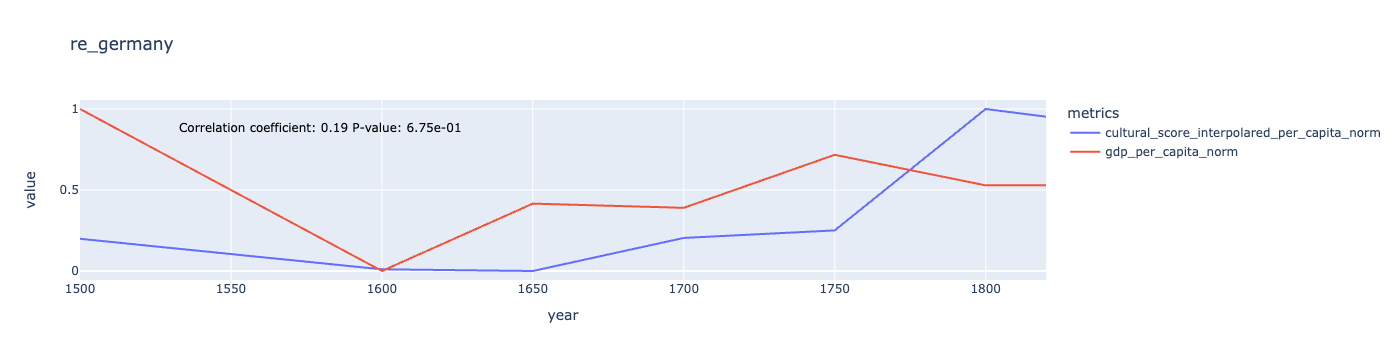

                                         OLS Regression Results                                        
Dep. Variable:     cultural_score_interpolared_per_capita_norm   R-squared:                       0.196
Model:                                                     OLS   Adj. R-squared:                  0.138
Method:                                          Least Squares   F-statistic:                     3.405
Date:                                         Mon, 03 Apr 2023   Prob (F-statistic):             0.0262
Time:                                                 17:48:40   Log-Likelihood:                 25.125
No. Observations:                                           46   AIC:                            -42.25
Df Residuals:                                               42   BIC:                            -34.94
Df Model:                                                    3                                         
Covariance Type:                                     nonrobust  

In [44]:
for exemple in set(df_score_all['region_code']):
    
    try:

        df_score = df_score_all[df_score_all['region_code']==exemple]

        #df_score['year'] = df_score["impact_years"].apply(
        #lambda x: [year for year in range(int(x[0]), int(x[1]) + 10, 10)]
        #)

        #df_score = df_score.explode('year')

        #df_score = df_score_all.copy()

        df_score['year'] = df_score['birthyear'].apply(lambda x : round_to_nearest_new(x, num = 10))
        #df_score['year'] = df_score['year'] + 35

        df_trend = df_score.groupby(['region_code', 'year'])['cultural_score'].sum().reset_index()
        df_trend = df_trend[df_trend['year']<=max(df_trend['year'])-10]

        year_range = np.arange(-1000, 1850, 1)
        df_year = pd.DataFrame(year_range, columns = ['year']).reset_index(drop=True)

        # interpolate region_code
        df_trend_interpolated_list = []
        for reg in set(df_trend['region_code']):

            res = df_trend[df_trend['region_code']==reg]
            res = pd.merge(res, df_year, on = 'year', how = 'outer')
            res['region_code'] = reg
            res = res.sort_values('year', ascending=True
                                 )
            res['cultural_score_interpolared'] = res['cultural_score'].interpolate(method='linear')
            res = res.reset_index(drop=True)
            res = res[~res['cultural_score_interpolared'].isna()]

            df_trend_interpolated_list.append(res)

        df_trend_interpolated = pd.concat([x for x in df_trend_interpolated_list])
        df_trend_interpolated = df_trend_interpolated.reset_index(drop=True)
        df_trend_interpolated = df_trend_interpolated.drop('cultural_score', axis=1)

        # interpolate population
        df_pop_interpolated = interpolate_yearly(df_population, value = 'value', category = 'region_code', year = 'year')
        df_pop_interpolated = df_pop_interpolated.drop('value', axis=1)
        df_pop_interpolated = df_pop_interpolated.rename(columns = {'value_interpolated':'pop_interpolated'})

        # create stats dataset
        df_stats  = pd.merge(df_trend_interpolated, df_maddison, on = ['region_code', 'year'])
        df_stats = pd.merge(df_stats, df_pop_interpolated, on = ['region_code', 'year'])
        df_stats['gdp'] = df_stats['gdp_per_capita']*df_stats['pop_interpolated']
        df_stats['cultural_score_interpolared_per_capita'] = df_stats['cultural_score_interpolared']/df_stats['pop_interpolated']

        # normalize values
        from sklearn import preprocessing

        min_max_scaler = preprocessing.MinMaxScaler()

        df_stats['cultural_score_interpolared_per_capita_norm'] =  min_max_scaler.fit_transform(df_stats[['cultural_score_interpolared_per_capita']])
        df_stats['cultural_score_interpolared_norm'] =  min_max_scaler.fit_transform(df_stats[['cultural_score_interpolared']])
        df_stats['gdp_per_capita_norm'] =  min_max_scaler.fit_transform(df_stats[['gdp_per_capita']])
        df_stats['pop_interpolated_norm'] =  min_max_scaler.fit_transform(df_stats[['pop_interpolated']])
        df_stats['gdp_norm'] =  min_max_scaler.fit_transform(df_stats[['gdp']])
        #df_stats = df_stats[1:]


        import statsmodels.formula.api as smf

        # perform a multiple regression analysis with 'country' as a control variable
        model = smf.ols('cultural_score_interpolared_per_capita_norm ~ gdp_per_capita_norm + year + pop_interpolated_norm', data=df_stats)
        results = model.fit()
        print(results.summary())

        df_stats_comparison = df_stats.set_index(['region_code', 'year'])
        df_stats_comparison = df_stats_comparison.unstack().T.reset_index()
        df_stats_comparison = df_stats_comparison.reset_index()
        df_stats_comparison = df_stats_comparison.rename(columns = {'level_0':'metrics', exemple:'value'})

        metrics_chosen = ['gdp_per_capita_norm', 'cultural_score_interpolared_per_capita_norm']

        df_fig = df_stats_comparison[df_stats_comparison['metrics'].isin(metrics_chosen)]
        fig = px.line(df_fig, x = 'year', y = 'value', color = 'metrics', title = exemple, width = 1200)



        corr_coef, p_value =  pearsonr(df_stats['gdp_per_capita_norm'], df_stats['cultural_score_interpolared_per_capita_norm'])

        # Add text annotation for correlation coefficient and p-value
        fig.add_annotation(
            x=0.1, y=0.9,
            text=f'Correlation coefficient: {corr_coef:.2f}\nP-value: {float(p_value):.2e}{get_stars(p_value)}',
            showarrow=False,
            xref='paper', yref='paper',
            font=dict(size=12, color='black')
        )
        
        print("")
        print(f"Number of observations: {len(df_stats)}")
        print("")
        fig.show()
        #fig.write_image(f"figures_gdp_cultural_per_capita/{exemple}.png", scale=3)
        
    except:
        pass

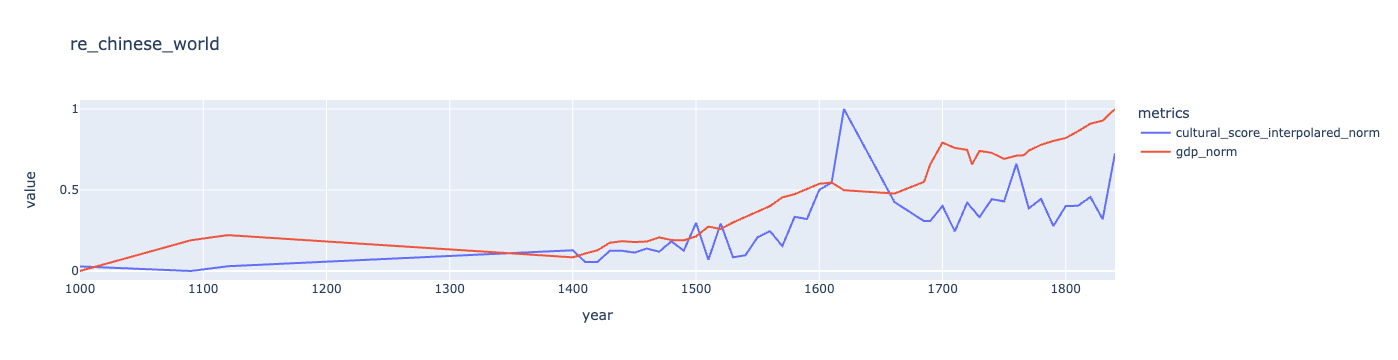

In [40]:
metrics_chosen = ['gdp_norm', 'cultural_score_interpolared_norm']

df_fig = df_stats_comparison[df_stats_comparison['metrics'].isin(metrics_chosen)]
fig = px.line(df_fig, x = 'year', y = 'value', color = 'metrics', title = exemple, width = 1200)

fig

In [34]:
set(df_stats_comparison.metrics)

{'cultural_score_interpolared',
 'cultural_score_interpolared_norm',
 'cultural_score_interpolared_per_capita',
 'cultural_score_interpolared_per_capita_norm',
 'gdp',
 'gdp_norm',
 'gdp_per_capita',
 'gdp_per_capita_norm',
 'pop_interpolated',
 'pop_interpolated_norm'}

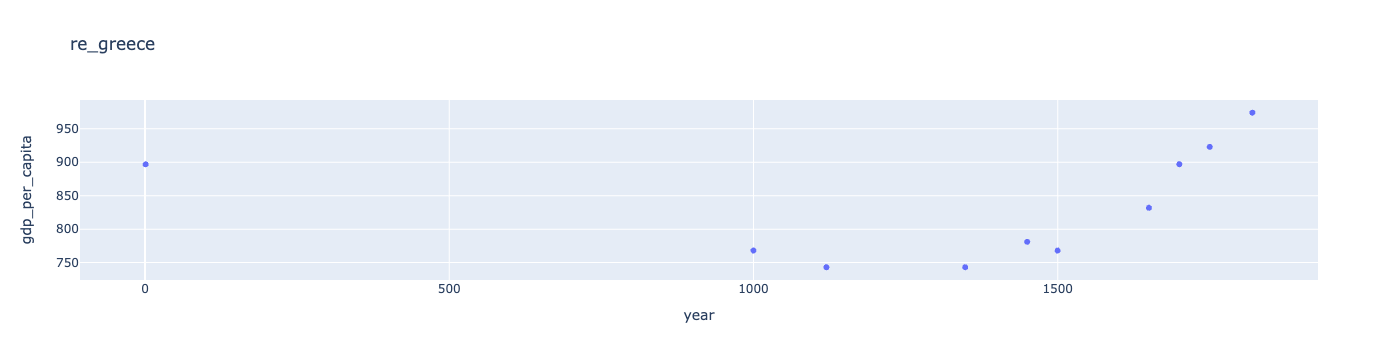

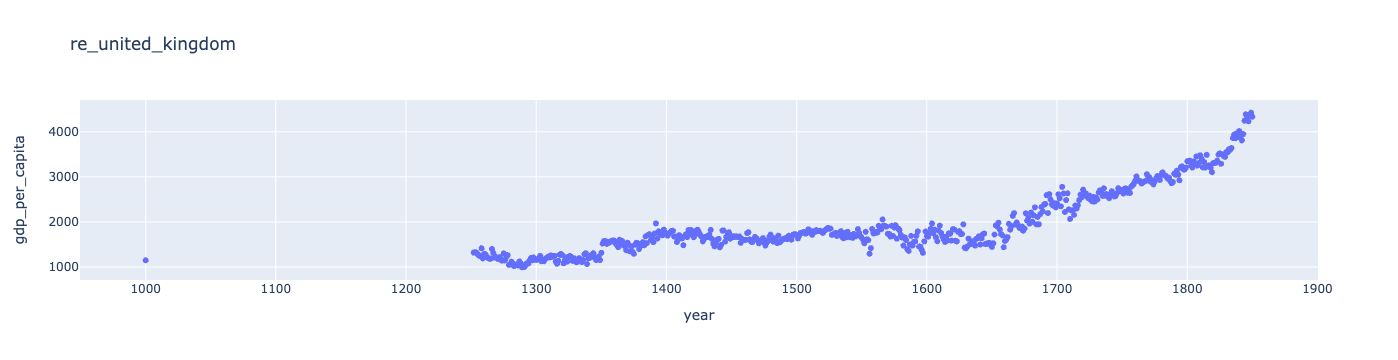

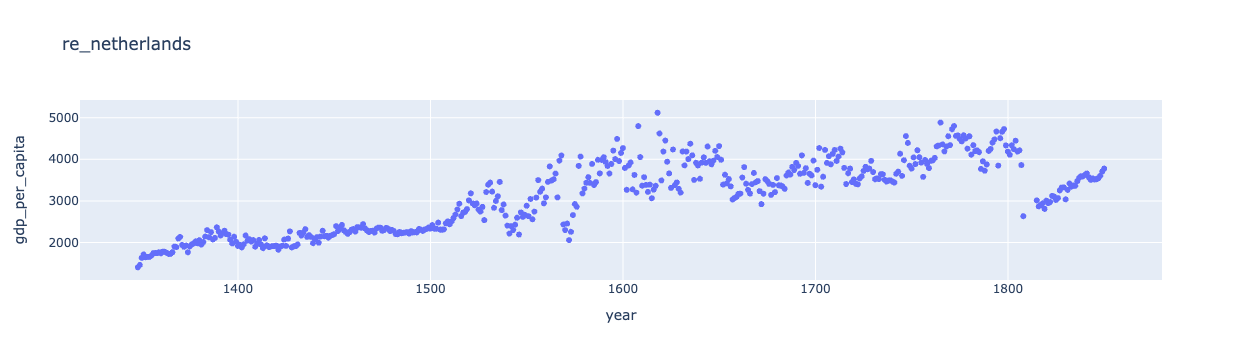

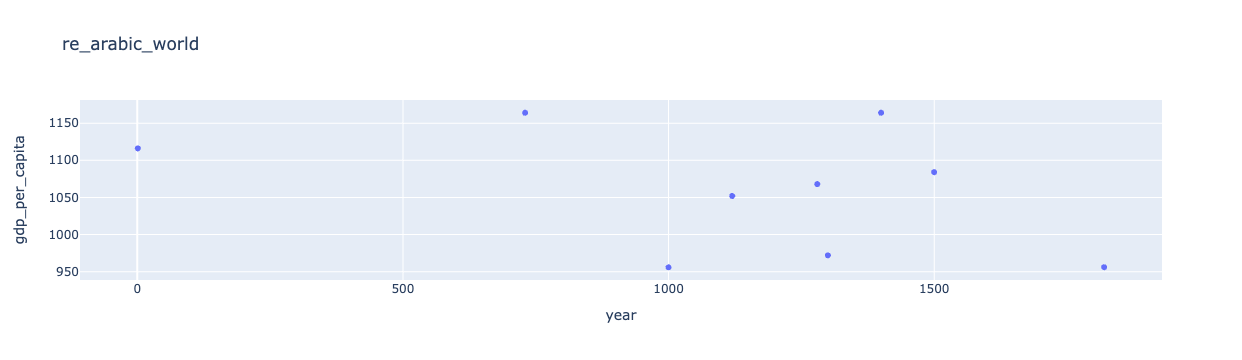

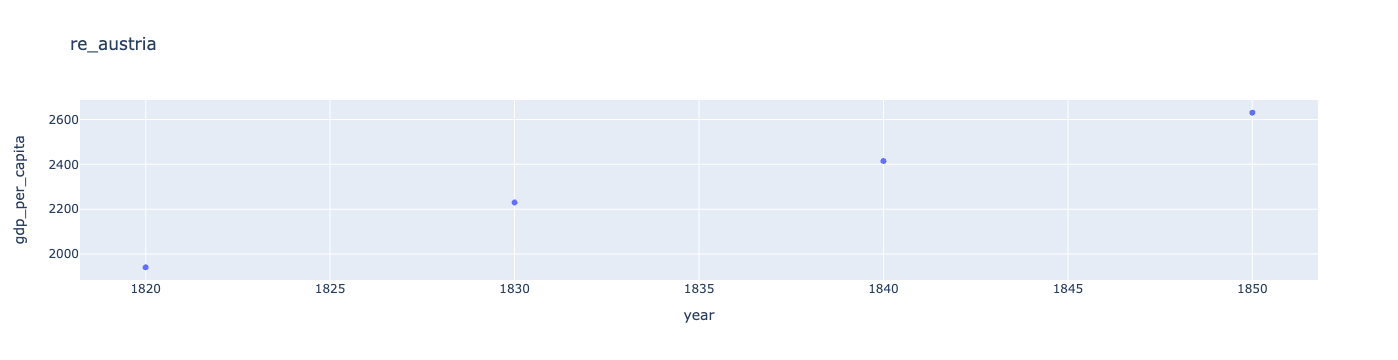

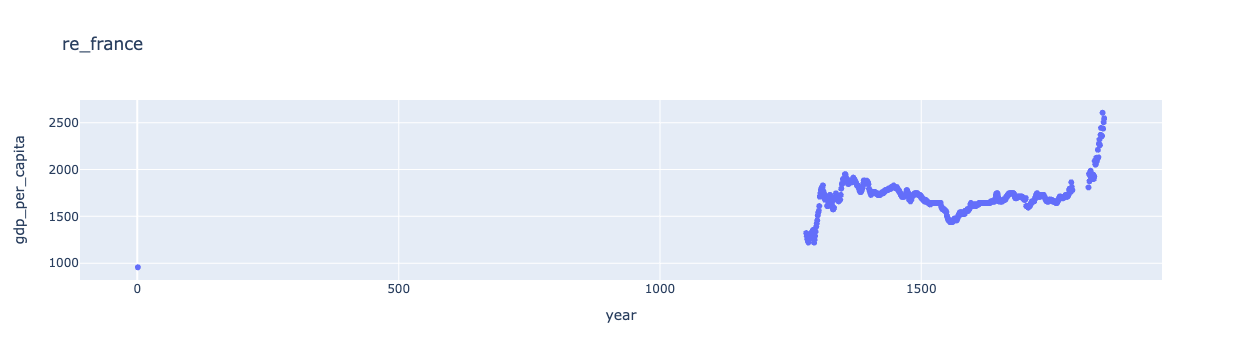

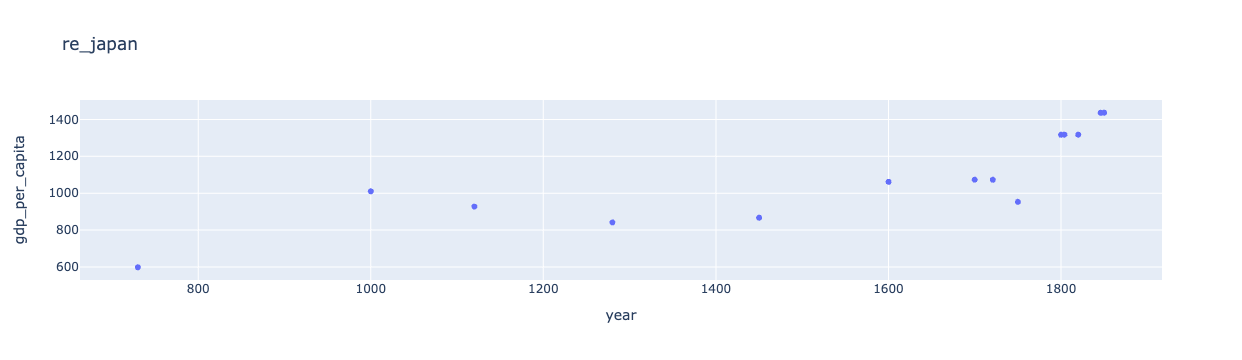

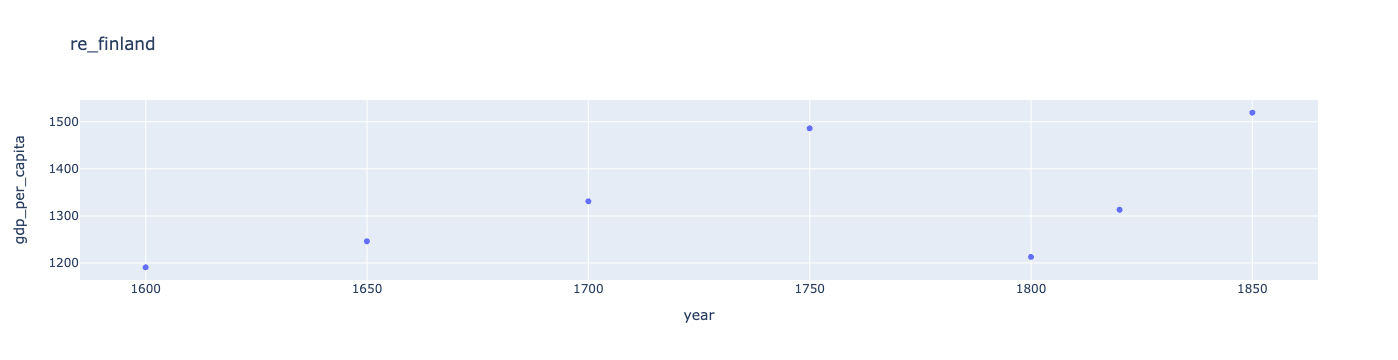

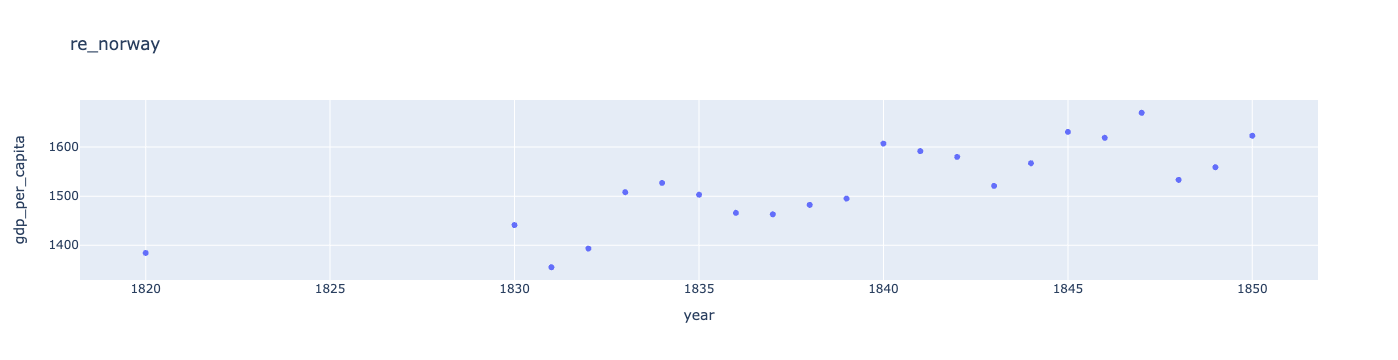

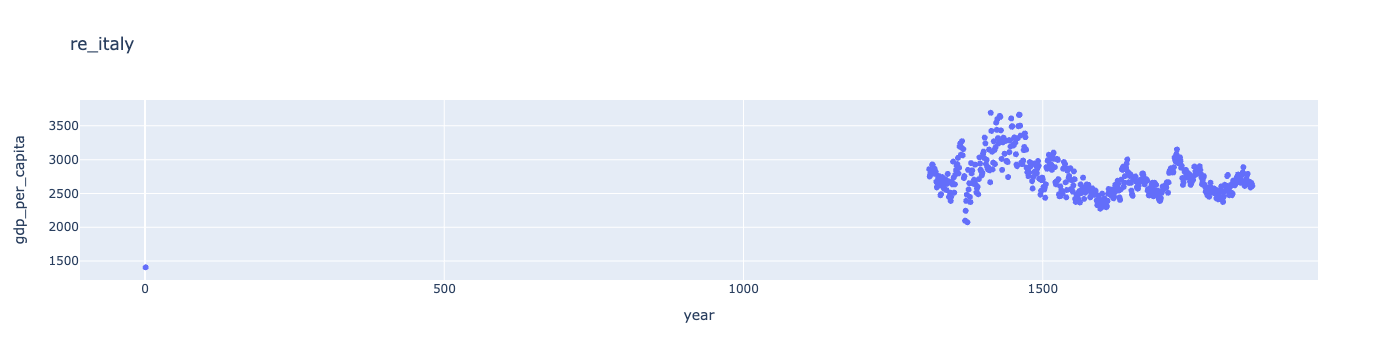

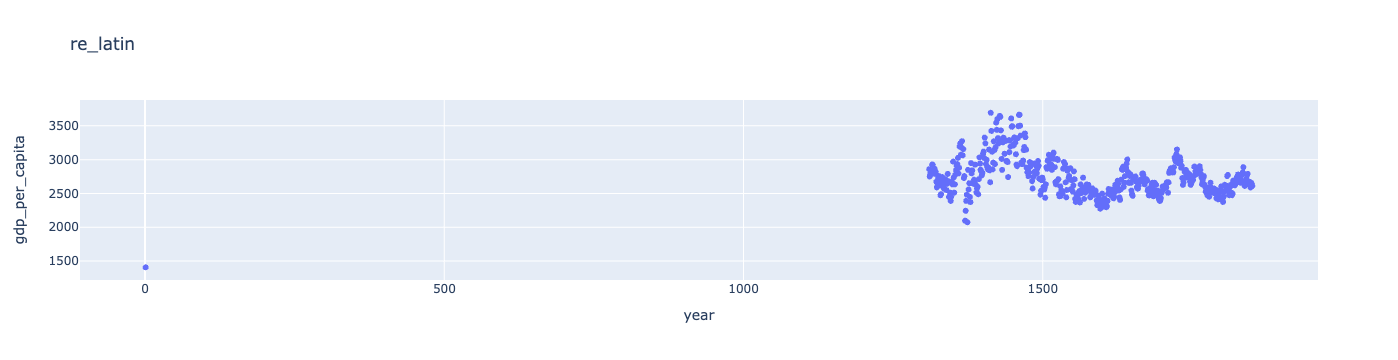

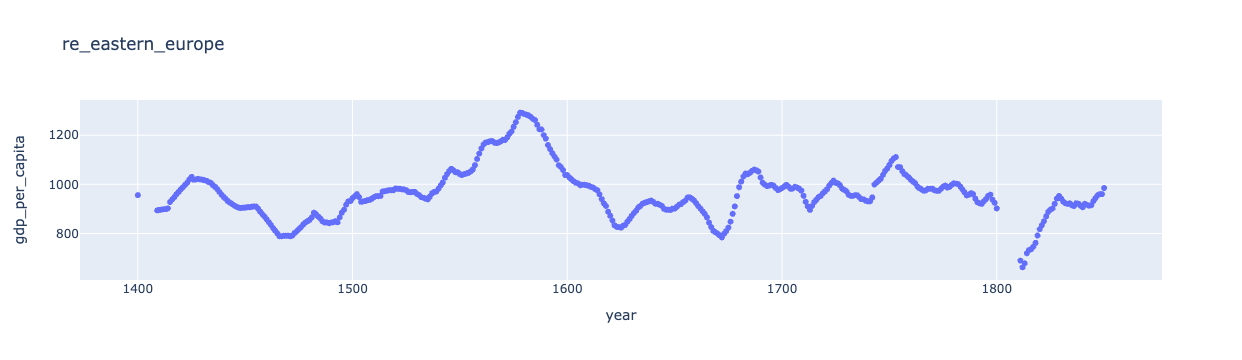

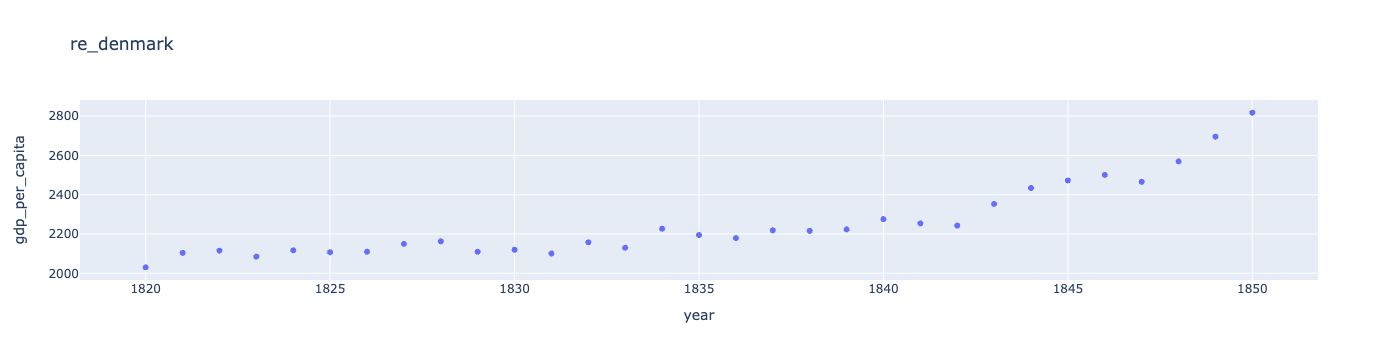

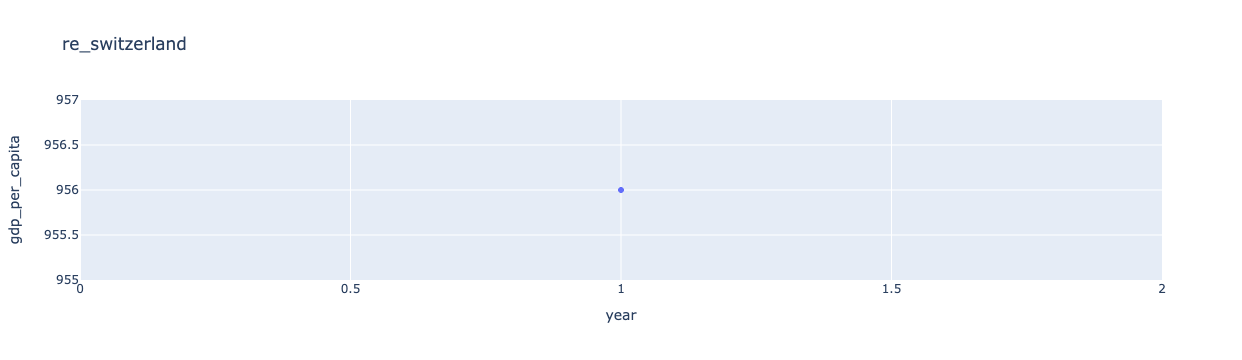

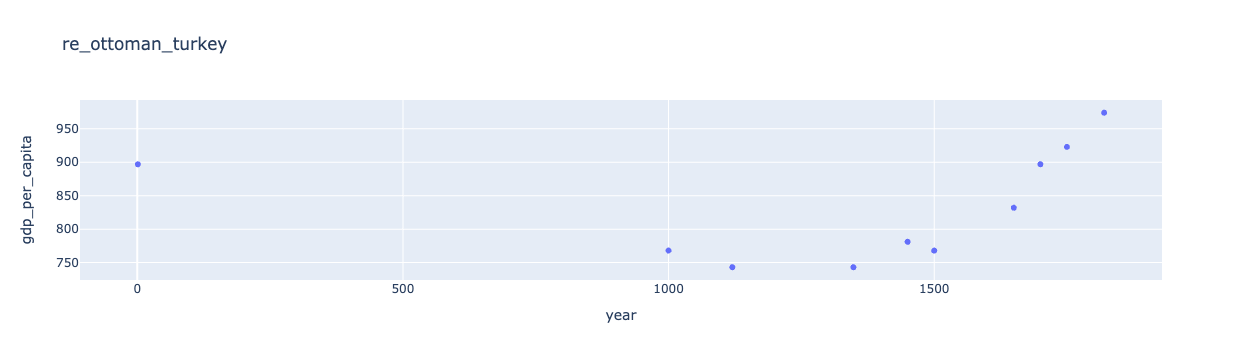

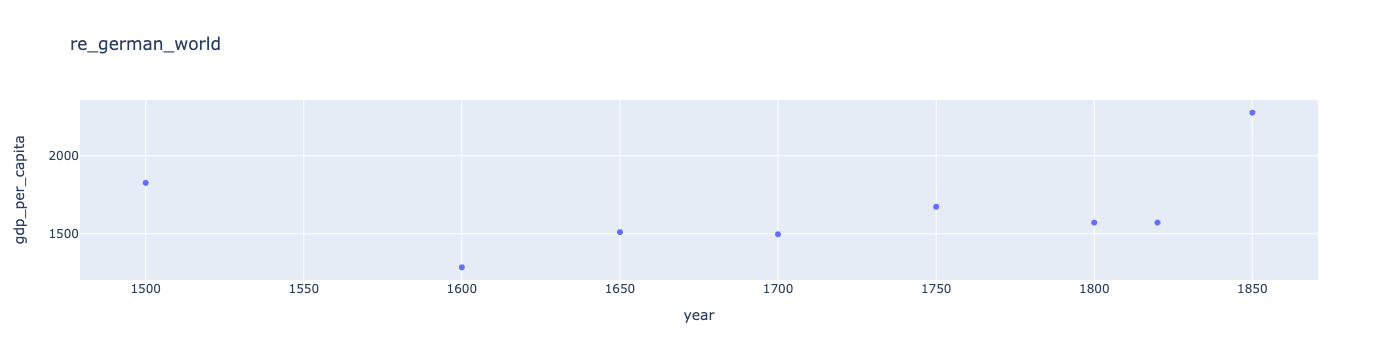

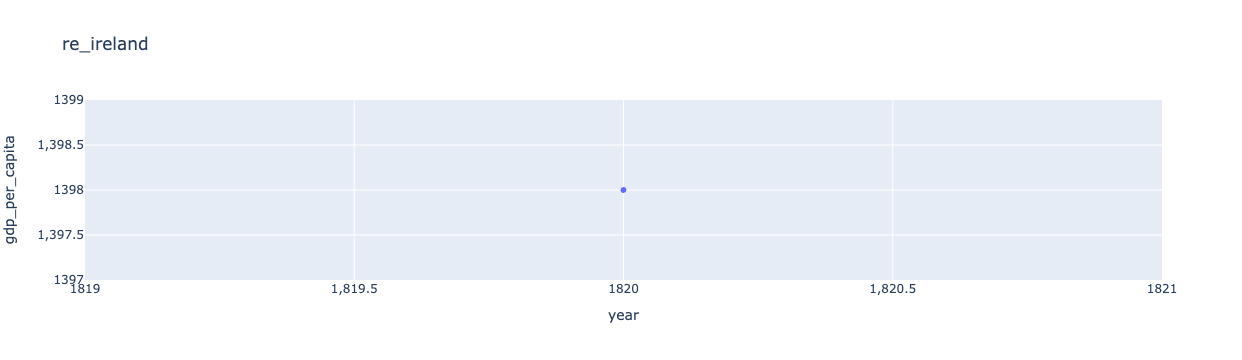

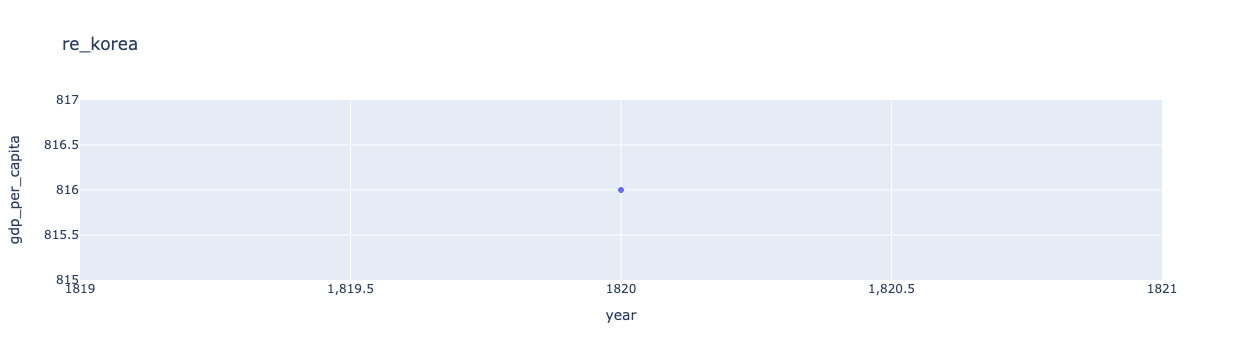

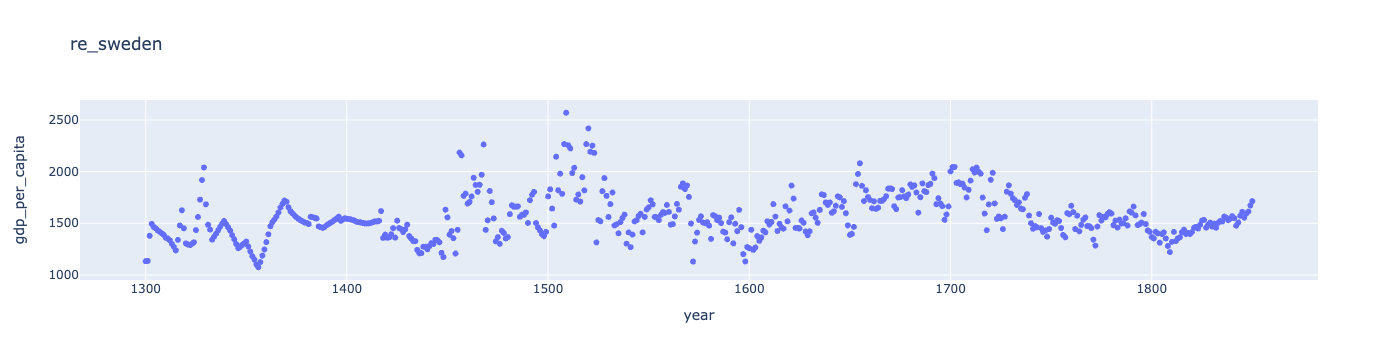

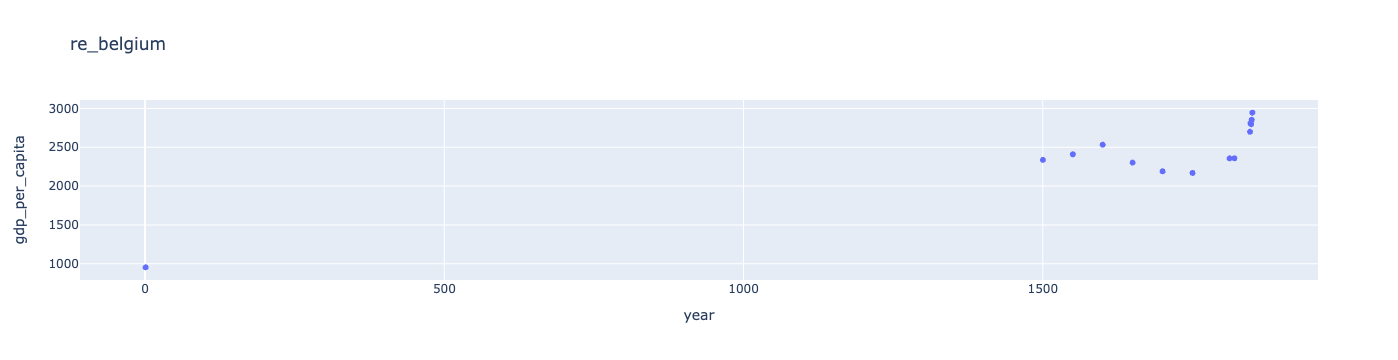

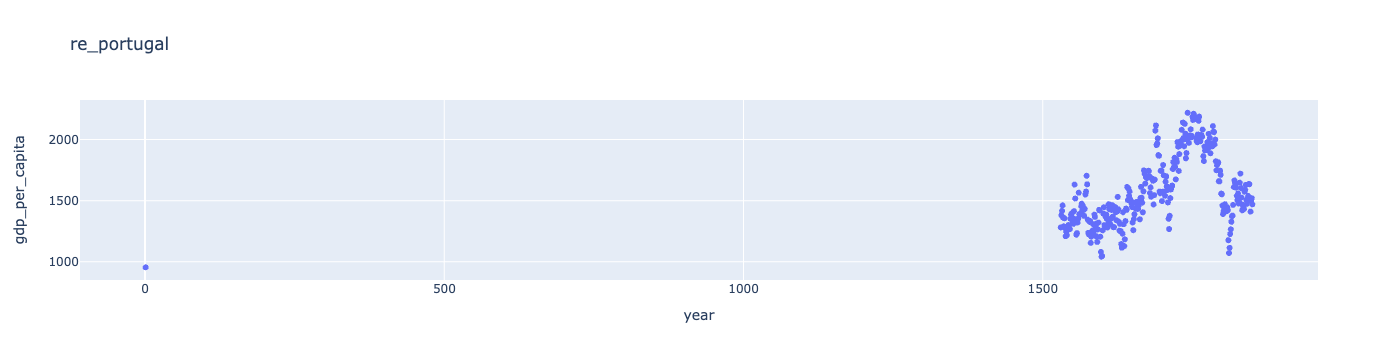

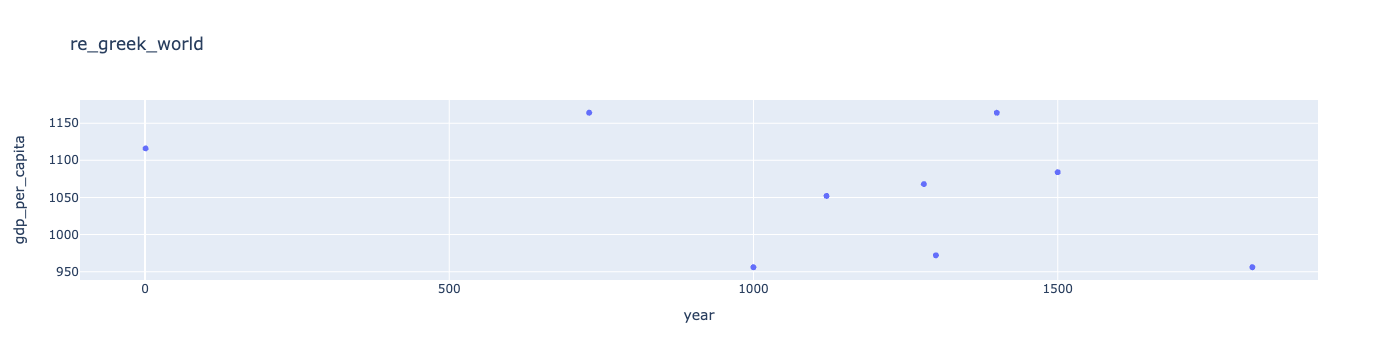

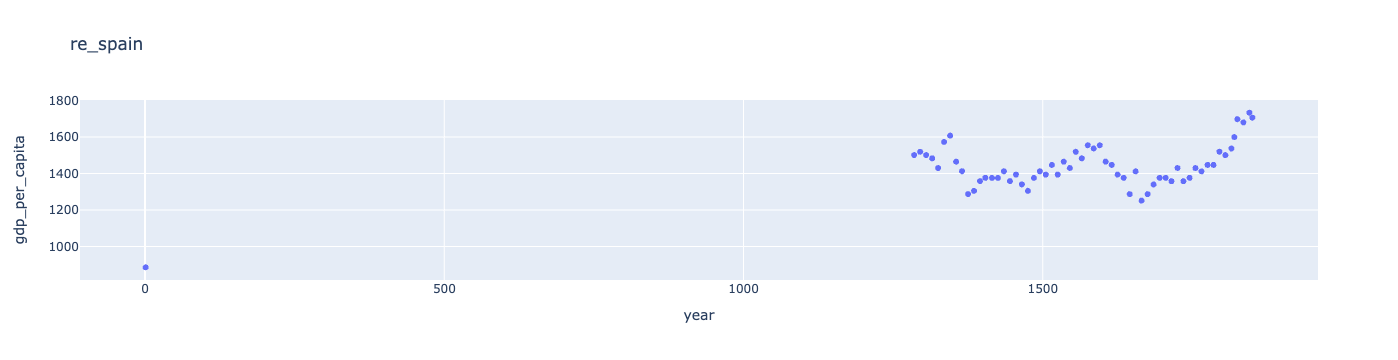

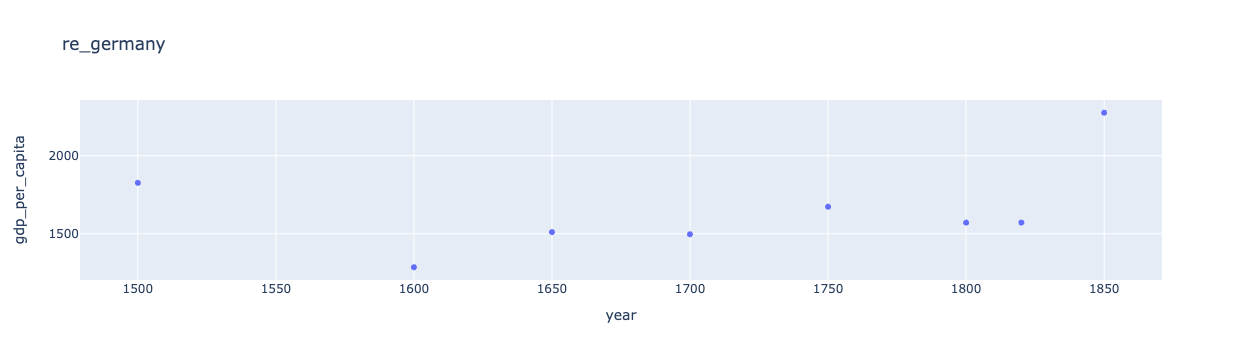

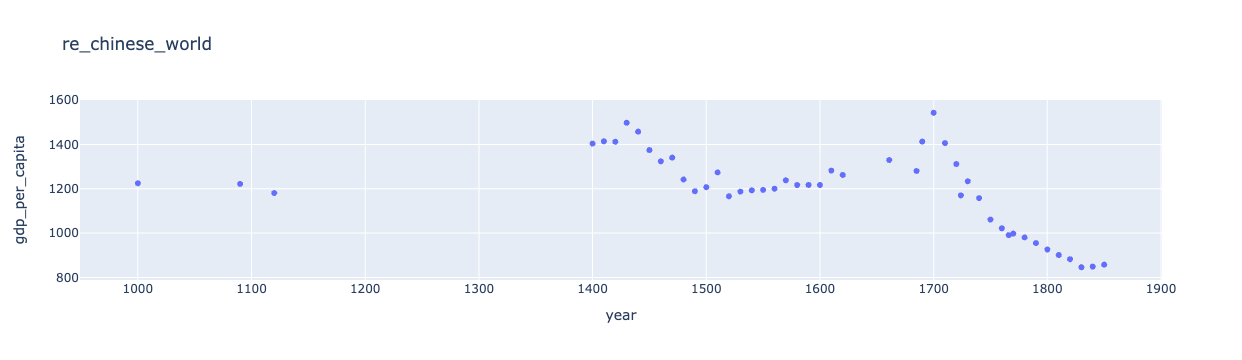

In [50]:
df_maddison_before = df_maddison[df_maddison['year']<=1850]

for region in set(df_maddison_before.region_code):
    df_fig = df_maddison_before[df_maddison_before['region_code']==region]
    fig = px.scatter(df_fig, x = 'year', y = 'gdp_per_capita', title = region)
    fig.show()

In [ ]:
# japan ok
# 